In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import sys
from matplotlib import pyplot as plt
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

# returns a LaTeX bmatrix with dots in both rowwise and columnwise directions 
# for matrices larger than 8x8,
# for each row, the first 4 and last 4 elements are printed out
# for each column, the first 4 and last 4 elements are printed out
def bmatrix_with_dots_in_both_directions(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    rv = ["\\begin{bmatrix}"]
    # print everything in one line and limit to 5 decimal places
    if a.shape[0] <= 8 and a.shape[1] <= 8:
        rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    else:
        for i in range(4):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
        rv += ["\\vdots"]
        for i in range(a.shape[0]-4, a.shape[0]):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
    rv +=  ["\\end{bmatrix}"]
    return '\n'.join(rv)

def bmatrix_with_dots(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    rv = ["\\begin{bmatrix}"]
    # print everything in one line and limit to 5 decimal places
    if a.shape[0] <= 8 and a.shape[1] <= 8:
        rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    else:
        for i in range(4):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
        rv += ["\\vdots"]
        for i in range(a.shape[0]-4, a.shape[0]):
            rv += [', '.join([str(round(x, 5)) for x in a[i, :]])]
    rv +=  ["\\end{bmatrix}"]
    return '\n'.join(rv)

    

def matrix_with_commas_in_between(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('matrix_with_commas_in_between can at most display two dimensions')
    rv = ["["]
    # print everything in one line and limit to 5 decimal places
    rv += [', '.join([str(round(x, 5)) for x in a.flatten()])] 
    rv +=  ["]"]
    return '\n'.join(rv)


In [ ]:
# 1x1x4
# A : 4x3
G = nx.grid_graph((4,1))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(A)

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

# sparse table analysis
a = np.block([[A, np.zeros((4, 4)), np.zeros((4, 3))]])
b = np.block([[np.zeros((3, 3)), np.eye(3), -A.T]])
c = np.block([[K_v, K_i, np.zeros((3, 4))]])

print(a.shape)
print(b.shape)
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print(bmatrix(SP))

print("========================= 1x1x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 1x1x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(bmatrix(Y))
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")


In [ ]:
# 1x4x4
# A : 16x24
G = nx.grid_graph((4,4))

plt.figure(figsize=(6,6))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='lightblue', 
        with_labels=True,
        node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(bmatrix(A))

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

print(bmatrix(K_v))
print(bmatrix(K_i))

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print(bmatrix(SP))

print("========================= 1x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 1x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T

print(bmatrix(Y))

L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")




In [ ]:
# 4x4x4
# A : 64x96
G = nx.grid_graph((4,4,4))

plt.figure(figsize=(6,6))
# pos = {(x,y):(y,-x) for x,y in G.nodes()}
# nx.draw(G, pos=pos, 
#         node_color='lightblue', 
#         with_labels=True,
#         node_size=600)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)
A = incidence_matrix.toarray()
print(A.shape)
print(bmatrix(A))

# number of nodes, branches
num_nodes = A.shape[0]
num_branches = A.shape[1]

# K : 3x3
K_v = -1 * np.eye(num_branches)
K_i = np.eye(num_branches)

print(bmatrix(K_v))
print(bmatrix(K_i))

# sparse table analysis
a = np.block([[A, np.zeros((num_nodes, num_branches)), np.zeros((num_nodes, num_nodes))]])
print(a.shape)
b = np.block([[np.zeros((num_branches, num_branches)), np.eye(num_branches), -A.T]])  # 24x16
print(b.shape)
c = np.block([[K_v, K_i, np.zeros((num_branches, num_nodes))]])
print(c.shape)

SP = np.concatenate((a,b,c), axis=0)

print("========================= 4x4x4 SP Table =========================")
L, V = np.linalg.eig(SP)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(2 * num_branches + num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")

print("========================= 4x4x4 Nodal Analysis =========================")
# nodal analysis
Y = A@K_v@A.T
print(Y)
L, V = np.linalg.eig(Y)
# sort by eigenvalues
idx = L.argsort()[::-1]   
eigenValues = L[idx]
eigenVectors = V[:,idx]
# print eigenvalues and eigenvectors
for i in range(num_nodes):
        print("Eigenval: ", eigenValues[i], "\\\\")
        print("Eigenvec: ", matrix_with_commas_in_between(eigenVectors[i]), "\\\\")


In [ ]:
2

# this is a 15x24 matrix
m = np.zeros((15,24))
# 1 for (0, a)
m[0,0] = 1
# -1 for (0, e)
m[0,4] = -1
# -1 for (0, f)
m[0,5] = -1
# -1 for (0, g)
m[0,6] = -1

# 1 for (1, b)
m[1,1] = 1
# -1 for (1, f)
m[1,5] = -1
# -1 for (1, g)
m[1,6] = -1

# 1 for (2, c)
m[2,2] = 1
# -1 for (2, g)

# 1 for (4, h)
m[4,7] = 1
# -1 for (4, l)
m[4,11] = -1
# -1 for (4, m)
m[4,12] = -1
# -1 for (4, n)
m[4,13] = -1

# 1 for (5, i)
m[5,8] = 1
# -1 for (5, m)
m[5,12] = -1
# -1 for (5, n)
m[5,13] = -1

# 1 for (6, j)
m[6,9] = 1
# -1 for (6, n)
m[6,13] = -1

# 1 for (8, o)
m[8,14] = 1
# -1 for (8, s)
m[8,18] = -1
# -1 for (8, t)
m[8,19] = -1
# -1 for (8, u)

# 1 for (9, p)
m[9,15] = 1
# -1 for (9, t)
m[9,19] = -1
# -1 for (9, u)
m[9,20] = -1

# 1 for (10, q)
m[10,16] = 1
# -1 for (10, u)
m[10,20] = -1

# 1 for (12, v)
m[12,21] = 1
# -1 for (12, s)
m[12,18] = -1
# -1 for (12, t)
m[12,19] = -1
# -1 for (12, u)
m[12,20] = -1

# 1 for (13, w)
m[13,22] = 1
# -1 for (13, t)
m[13,19] = -1
# -1 for (13, u)
m[13,20] = -1

# 1 for (14, x)
m[14,23] = 1
# -1 for (14, u)
m[14,20] = -1

# 1 for (3, d)
m[3,3] = 1
# 1 for (3, e)
m[3,4] = 1
# 1 for (3, f)
m[3,5] = 1
# 1 for (3, g)
m[3,6] = 1

# 1 for (7, k)
m[7,10] = 1
# 1 for (7, l)
m[7,11] = 1
# 1 for (7, m)
m[7,12] = 1
# 1 for (7, n)
m[7,13] = 1

# 1 for (11, r)
m[11,17] = 1
# 1 for (11, s)
m[11,18] = 1
# 1 for (11, t)
m[11,19] = 1
# 1 for (11, u)
m[11,20] = 1

print(bmatrix(m))



<IPython.core.display.Javascript object>


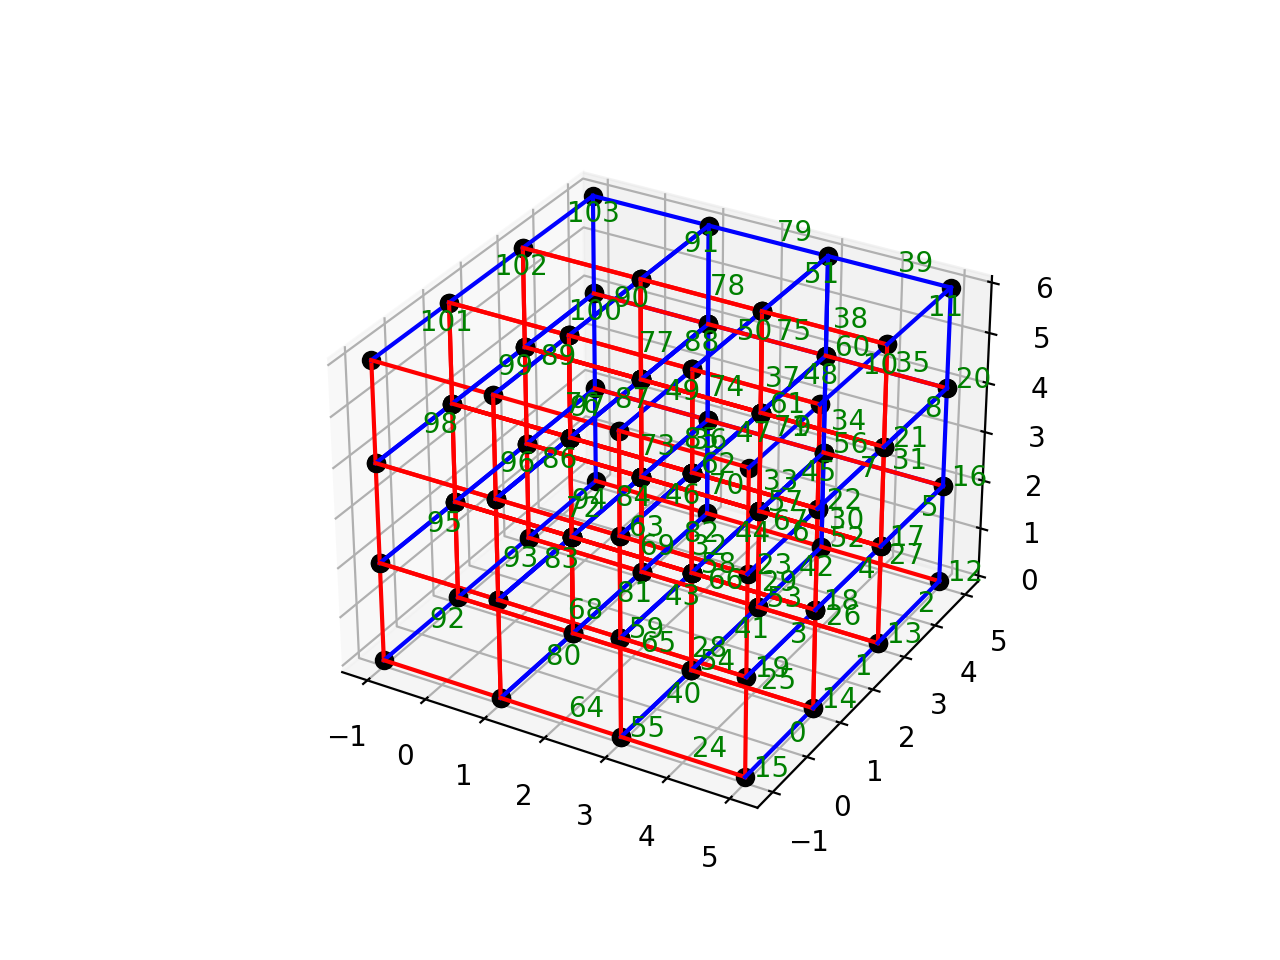

In [10]:
# a 63 X 144 matrix
def get_cube(limits=None):
    """get the vertices, edges, and faces of a cuboid defined by its limits

    limits = np.array([[x_min, x_max],
                       [y_min, y_max],
                       [z_min, z_max]])
    """
    v = np.array([[0, 0, 0], [0, 0, 1],
                  [0, 1, 0], [0, 1, 1],
                  [1, 0, 0], [1, 0, 1],
                  [1, 1, 0], [1, 1, 1]], dtype=int)

    if limits is not None:
        v = limits[np.arange(3)[np.newaxis, :].repeat(8, axis=0), v]
        
#     v = 50*v

    e = np.array([[0, 1], [0, 2], [0, 4],
                  [1, 3], [1, 5],
                  [2, 3], [2, 6],
                  [3, 7],
                  [4, 5], [4, 6],
                  [5, 7],
                  [6, 7]], dtype=int)

    f = np.array([[0, 2, 3, 1],
                  [0, 4, 5, 1],
                  [0, 4, 6, 2],
                  [1, 5, 7, 3],
                  [2, 6, 7, 3],
                  [4, 6, 7, 5]], dtype=int)

    return v, e, f

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 1
limits = np.array([[-1, 1],
                   [-1, 1],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
    
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 2
limits = np.array([[1, 3],
                   [-1, 1],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 3
limits = np.array([[3, 5],
                   [-1, 1],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 4
limits = np.array([[-1, 1],
                   [-1, 1],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 5
limits = np.array([[1, 3],
                   [-1, 1],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 6
limits = np.array([[3, 5],
                   [-1, 1],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 7
limits = np.array([[-1, 1],
                   [-1, 1],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
# 8
limits = np.array([[1, 3],
                   [-1, 1],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 9
limits = np.array([[3, 5],
                   [-1, 1],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 1
limits = np.array([[-1, 1],
                   [1, 3],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
    
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
# 2
limits = np.array([[1, 3],
                   [1, 3],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 3
limits = np.array([[3, 5],
                   [1, 3],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 4
limits = np.array([[-1, 1],
                   [1, 3],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 5
limits = np.array([[1, 3],
                   [1, 3],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 6
limits = np.array([[3, 5],
                   [1, 3],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 7
limits = np.array([[-1, 1],
                   [1, 3],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 8
limits = np.array([[1, 3],
                   [1, 3],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 9
limits = np.array([[3, 5],
                   [1, 3],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 1
limits = np.array([[-1, 1],
                   [3, 5],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
    
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 2
limits = np.array([[1, 3],
                   [3, 5],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
# 3
limits = np.array([[3, 5],
                   [3, 5],
                   [0, 2]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
# 4
limits = np.array([[-1, 1],
                   [3, 5],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 5
limits = np.array([[1, 3],
                   [3, 5],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 6
limits = np.array([[3, 5],
                   [3, 5],
                   [2, 4]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 7
limits = np.array([[-1, 1],
                   [3, 5],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')

# 8
limits = np.array([[1, 3],
                   [3, 5],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
    
# 9
limits = np.array([[3, 5],
                   [3, 5],
                   [4, 6]])

v, e, f = get_cube(limits)

ax.plot(*v.T, marker='o', color='k', ls='')
for i, j in e:
    if i == 0 and j == 2:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 1 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 5 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 4 and j == 6:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 3 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 6 and j == 7:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    elif i == 2 and j == 3:
        ax.plot(*v[[i, j], :].T, color='b', ls='-')
    else:
        ax.plot(*v[[i, j], :].T, color='r', ls='-')
        
#     e = np.array([[0, 1], [0, 2], [0, 4],
#                   [1, 3], [1, 5],
#                   [2, 3], [2, 6],
#                   [3, 7],
#                   [4, 5], [4, 6],
#                   [5, 7],
#                   [6, 7]], dtype=int)
index = 0
X = 5
ax.text(X, 0, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 0, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 2, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 4, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 6, " {} ".format(index), color='g')
index+=1

# side
ax.text(X, 5, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 5, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 5, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 4, " {} ".format(index), color='g')
index+=1

# back
ax.text(X-1, -1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 0, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 2, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 4, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 6, " {} ".format(index), color='g')
index+=1


X = 3
ax.text(X, 0, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 0, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 2, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 4, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 6, " {} ".format(index), color='g')
index+=1

# side
ax.text(X, 5, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 5, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 5, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 3, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, -1, 4, " {} ".format(index), color='g')
index+=1

# back
ax.text(X-1, -1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 0, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 0, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 2, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 2, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 4, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 4, " {} ".format(index), color='g')
index+=1

ax.text(X-1, -1, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 1, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 3, 6, " {} ".format(index), color='g')
index+=1
ax.text(X-1, 5, 6, " {} ".format(index), color='g')
index+=1

X = 1
ax.text(X, 0, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 0, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 2, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 4, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 6, " {} ".format(index), color='g')
index+=1

X = -1
ax.text(X, 0, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 0, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 0, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 2, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 2, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 4, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 4, " {} ".format(index), color='g')
index+=1

ax.text(X, 0, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 2, 6, " {} ".format(index), color='g')
index+=1
ax.text(X, 4, 6, " {} ".format(index), color='g')
index+=1

